In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords


In [2]:
df = pd.read_csv('Hate_speech_dataset_gabAndReddit.csv')


In [3]:
df.sample(10)

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
12577,A-Benchmark-Dataset-for-Learning-to-Intervene-...,Fuck off retarded feminist morons,2,Fuck retarded feminist moron,Fuck retarded feminist moron
12272,A-Benchmark-Dataset-for-Learning-to-Intervene-...,The Jews run BOTH political parties The alt...,0,Jews run political party altright never politi...,Jews run political party altright never politi...
1109,A-Benchmark-Dataset-for-Learning-to-Intervene-...,I would slap the fuck out that cunt bitch,1,would slap fuck cunt bitch,would slap fuck cunt bitch
6639,A-Benchmark-Dataset-for-Learning-to-Intervene-...,It was his gift to retarded doves of lesser i...,1,gift retarded dove lesser iq sanz grease light...,gift retarded dove lesser iq sanz grease light...
2326,A-Benchmark-Dataset-for-Learning-to-Intervene-...,Ive never seen a liberal provide a reasonable...,0,Ive never seen liberal provide reasonable expl...,Ive never seen liberal provide reasonable expl...
5339,A-Benchmark-Dataset-for-Learning-to-Intervene-...,Dr Pierce was the last movement leader to tak...,1,Dr Pierce last movement leader take infrastruc...,Dr Pierce last movement leader take infrastruc...
14341,A-Benchmark-Dataset-for-Learning-to-Intervene-...,First time on Gab Found it cause I just got ...,1,First time Gab Found cause got another day Twi...,First time Gab Found cause got another day Twi...
6524,A-Benchmark-Dataset-for-Learning-to-Intervene-...,Like i said you jumped on my thread Look back...,1,Like said jumped thread Look back busy interfe...,Like said jumped thread Look back busy interfe...
10062,A-Benchmark-Dataset-for-Learning-to-Intervene-...,Tommy Robinson Is Deceiving You A common ...,1,Tommy Robinson Deceiving common theme islamona...,Tommy Robinson Deceiving common theme islamona...
11104,A-Benchmark-Dataset-for-Learning-to-Intervene-...,What a shit show Go to wwf if you want to jus...,1,shit show Go wwf want hug damn opponent isnt f...,shit show Go wwf want hug damn opponent isnt f...


In [4]:
df.shape


(15016, 5)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   corpus_name              15016 non-null  object
 1   raw_sentence             15016 non-null  object
 2   label                    15016 non-null  int64 
 3   clean_sentence_training  15014 non-null  object
 4   clean_sentence_EDA       15014 non-null  object
dtypes: int64(1), object(4)
memory usage: 586.7+ KB


In [28]:
stop_words = set(stopwords.words("english"))


<AxesSubplot:>

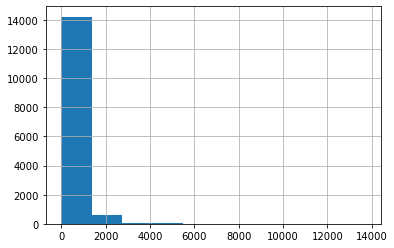

In [5]:
data = df['clean_sentence_EDA']
data.str.len().hist()

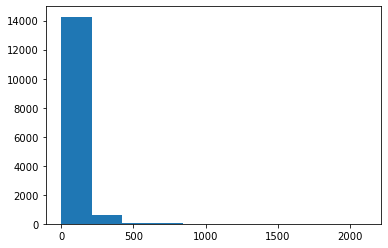

In [6]:
# count words to gain insights

counts = []

for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

In [21]:
# basic metrics

total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 812603 words.
Average length of words in the dataset: 5.690655830707 characters.
Average length of sentences in the dataset: 54.11580980287693 words.


## The histograms and metrics above show that most sentences in the corpus are about 1000+ character and 250+ word long. The total number of words in the dataset is 812 thousand. The average length of words is 5 characters.


In [11]:
all_words = []

for sentence in df['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['subsection', 'retarded', 'Hungarians', 'Ohh', 'boy', 'brace', 'livid', 'Bulbasaur', 'coming', 'trying', 'hate', 'hole', 'stupider', 'countryman', 'Hiii', 'got', 'work', 'mainly', 'typa', 'guy', 'imagine', 'writing', 'US', 'stupid', 'site', 'basically', 'try', 'fit', 'Western', 'European', 'US', 'big', 'city', 'hipster', 'Rich', 'kid', 'Budapest', 'feel', 'brave', 'journalistic', 'hero', 'wow', 'guess', 'soyboys', 'every', 'country', 'Owen', 'Benjamins', 'soyboy', 'song', 'go', 'every', 'country', 'thats', 'amazing', 'yall', 'hear', 'sumn', 'mean', 'live', 'small', 'town', 'rn', 'work', 'people', 'originally', 'mining', 'community', 'one', 'protesting', 'Nobody', 'mentioned', 'protest', 'today', 'Nobody', 'care', 'theyre', 'busy', 'loving', 'family', 'working', 'hard', 'Thank', 'god', 'electoral', 'college', 'Liberals', 'think', 'dont', 'matter', 'ah', 'liberal', 'slipped', 'tell', 'first', 'question', 'asked', 'loaded', 'retarded', 'working']


In [19]:
most_common = Counter(all_words).most_common(20)
print(most_common)

[('like', 7016), ('’', 6823), ('people', 5865), ('dont', 4267), ('get', 4218), ('nigger', 4140), ('one', 3938), ('woman', 3558), ('would', 3553), ('cunt', 3467), ('faggot', 3348), ('think', 3267), ('retarded', 3134), ('know', 3041), ('white', 2905), ('Im', 2812), ('shit', 2736), ('even', 2697), ('want', 2636), ('make', 2606)]


Text(0.5, 1.0, 'Top 50 Words vs Frequency')

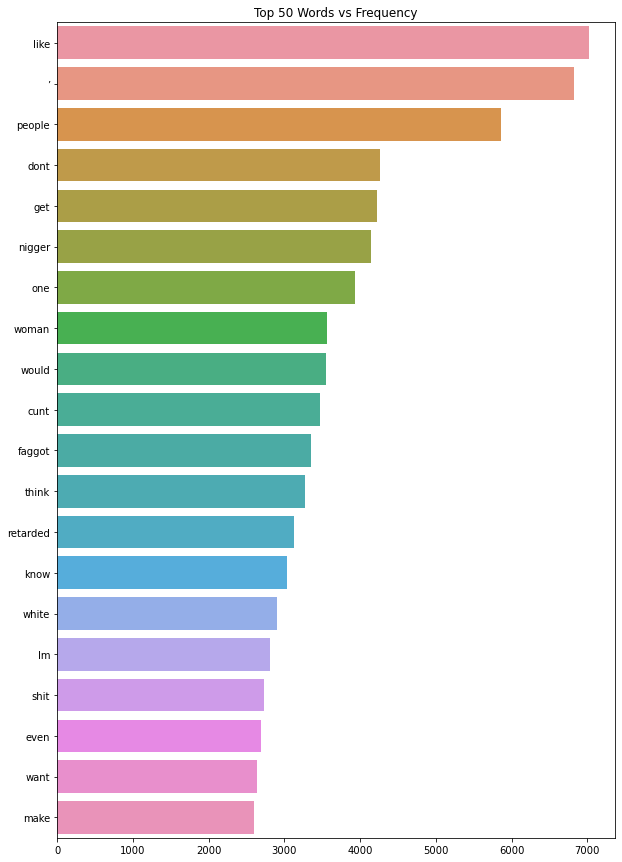

In [22]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)

f, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x = frequency, y = words).set_title('Top 50 Words vs Frequency')

In [42]:
all_words_clean = []

for row in df['clean_sentence_EDA']:
    words = word_tokenize(str(row))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['subsection', 'retarded', 'hungarians', 'ohh', 'boy', 'brace', 'livid', 'bulbasaur', 'coming', 'trying', 'hate', 'hole', 'stupider', 'countryman', 'hiii', 'got', 'work', 'mainly', 'typa', 'guy', 'imagine', 'writing', 'stupid', 'site', 'basically', 'try', 'fit', 'western', 'european', 'big', 'city', 'hipster', 'rich', 'kid', 'budapest', 'feel', 'brave', 'journalistic', 'hero', 'wow', 'guess', 'soyboys', 'every', 'country', 'owen', 'benjamins', 'soyboy', 'song', 'every', 'country', 'thats', 'amazing', 'yall', 'hear', 'sumn', 'mean', 'live', 'small', 'town', 'work', 'people', 'originally', 'mining', 'community', 'one', 'protesting', 'nobody', 'mentioned', 'protest', 'today', 'nobody', 'care', 'theyre', 'busy', 'loving', 'family', 'working', 'hard', 'thank', 'god', 'electoral', 'college', 'liberals', 'think', 'dont', 'matter', 'liberal', 'slipped', 'tell', 'first', 'question', 'asked', 'loaded', 'retarded', 'working', 'hard', 'mean', 'political', 'view', 'get']


In [43]:
most_common2 = Counter(all_words_clean).most_common(50)
print(most_common2)

[('like', 7467), ('people', 6316), ('nigger', 5117), ('dont', 4798), ('get', 4539), ('one', 4309), ('white', 3993), ('cunt', 3976), ('faggot', 3749), ('would', 3683), ('woman', 3621), ('retarded', 3392), ('think', 3355), ('know', 3124), ('even', 3051), ('fucking', 2985), ('shit', 2877), ('fuck', 2732), ('make', 2723), ('want', 2693), ('time', 2691), ('youre', 2691), ('right', 2686), ('say', 2529), ('thing', 2445), ('see', 2295), ('thats', 2151), ('need', 2065), ('retard', 2008), ('men', 1934), ('good', 1890), ('never', 1871), ('really', 1869), ('way', 1855), ('man', 1818), ('well', 1805), ('also', 1756), ('going', 1754), ('still', 1708), ('trump', 1691), ('year', 1687), ('look', 1667), ('got', 1660), ('said', 1659), ('cant', 1655), ('jew', 1635), ('guy', 1596), ('black', 1596), ('take', 1568), ('back', 1552)]


<AxesSubplot:>

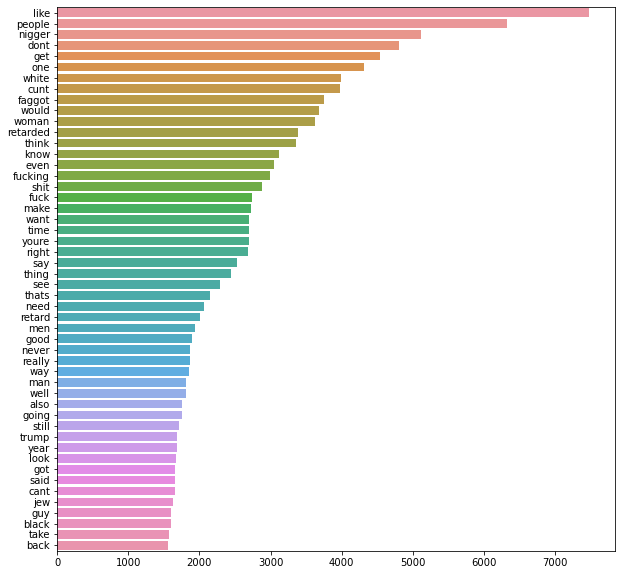

In [44]:
words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = frequency, y = words, ax=ax)

<AxesSubplot:xlabel='label', ylabel='count'>

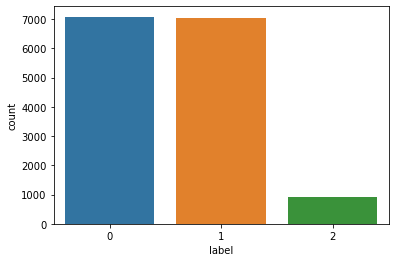

In [46]:
sns.countplot(x=df["label"])


In [55]:
risky = 0
non_risky = 0
Potentially_risky = 0

for label in str(df['label']):
    if label == '1':
        Potentially_risky += 1
    elif label == '2':
        risky += 1
    else:
        non_risky += 1

print(risky)
print(non_risky)
print(Potentially_risky)

2
140
19


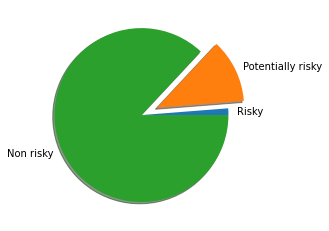

In [56]:
# plot a pie chart to show label proportions

y = np.array([risky, Potentially_risky, non_risky])
custom_labels = ["Risky", "Potentially risky", "Non risky"]
myexplode = [0, 0.2, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 

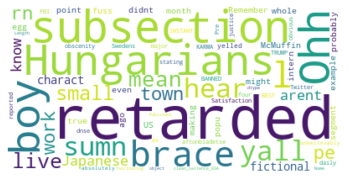

In [13]:
cloud_east_of_eden = WordCloud(background_color="white").generate(str(df['clean_sentence_EDA']))
                                                                 
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()